# Using watch data to avoid lazy days

I have found my smartwatch useful for measuring my levels of movement and exercise, but I have noticed my activity varies substantially day to day. If I were able to identify and understand which days I tend to move least, it should be fairly straightforward to improve my overall fitness and wellbeing with some simple adjustments.

The aim of this project is to explore my watch data, to reduce the number of days where I move very little.

As I think about how to become more consistent, I will explore two areas:

##### a) Are there days/ months I'm consistently moving less?

##### b) Is there any connection between my movement and other data? 
Such as my sleep, stepcount, or the presence or absence of a dedicated workout.

From this I hope to reach conclusions on what modest adjustments I can make to eradicate these low activity days.

### How I got the data

The data is sent from my Apple Watch to my phone's "Health" app. I used an app called "Health Export" to generate a csv file containing the data I selected for exploration.

### What data am I using?

I have selected the "Move" value as the best indicator of my daily activity. "Move" is an estimate of calories burned through moving, covering activity from light household chores, through to walking and more vigorous exercise.

1. Date: Recorded from 3rd October 2023 to 13th August 2024

2. Active Calories (kcal): the amount of calories burned by moving ('Move')

3. Cycling Distance (km): The distance cycled that day

4. Exercise Minutes: The number of minutes where activity level equals or exceeds a brisk walk

5. Flights Climbed (floors): Records gain of elevation, where a flight of stairs is equivalent to about 3m of elevation 

6. Resting Heart Rate (bpm): the number of heart beats per minute when at rest

7. Sleep: The time spent asleep the night before

8. Steps (steps): The number of steps walked or ran that day

9. Workout Type: The type of workout completed on any given day

10. DURATION: The time duration of recorded workouts

In [64]:
#Bring in the libraries I'll use

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime, time, timedelta

In [65]:
#load the data file

df = pd.read_csv('Oct_Aug_watch_data.csv')

df.head()

,Date,Active Calories (kcal),Cycling Distance (km),Exercise Minutes,Flights Climbed (floors),Resting Heart Rate (bpm),Sleep,Steps (steps),Workout Type,DURATION
0,03/10/2023,"1,226",-,2h 13m,25,60,-,"18,138",NaN,NaN
1,04/10/2023,"1,254",-,2h,19,53,2h 32m,"16,834",NaN,NaN
2,05/10/2023,"1,127",-,1h 37m,15,58,5h 56m,"15,883",NaN,NaN
3,06/10/2023,"1,150",-,1h 48m,22,56,7h 20m,"17,255",NaN,NaN
4,07/10/2023,538,-,30m,5,48,6h 12m,"6,746",NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      375 non-null    object
 1   Active Calories (kcal)    316 non-null    object
 2   Cycling Distance (km)     316 non-null    object
 3   Exercise Minutes          316 non-null    object
 4   Flights Climbed (floors)  316 non-null    object
 5   Resting Heart Rate (bpm)  316 non-null    object
 6   Sleep                     316 non-null    object
 7   Steps (steps)             316 non-null    object
 8   Workout Type              159 non-null    object
 9    DURATION                 159 non-null    object
dtypes: object(10)
memory usage: 29.4+ KB


In [67]:
#Rename some columns to make them easier to work with. I use "Move" for Active Calories because that's what my watch calls it

df.rename(columns = {"Active Calories (kcal)": "Move",
                     "Cycling Distance (km)": "Cycle Distance",
                     "Flights Climbed (floors)": "Flights Climbed",
                     "Resting Heart Rate (bpm)": "Resting HR",
                     "Steps (steps)": "Steps",
                     " DURATION": "Duration"},
          inplace = True)

#Move the Resting HR column to the right hand side- I don't expect to use it much

col = df.pop('Resting HR')
df.insert(9,'Resting HR',col)

In [68]:
df.head()

,Date,Move,Cycle Distance,Exercise Minutes,Flights Climbed,Sleep,Steps,Workout Type,Duration,Resting HR
0,03/10/2023,"1,226",-,2h 13m,25,-,"18,138",NaN,NaN,60
1,04/10/2023,"1,254",-,2h,19,2h 32m,"16,834",NaN,NaN,53
2,05/10/2023,"1,127",-,1h 37m,15,5h 56m,"15,883",NaN,NaN,58
3,06/10/2023,"1,150",-,1h 48m,22,7h 20m,"17,255",NaN,NaN,56
4,07/10/2023,538,-,30m,5,6h 12m,"6,746",NaN,NaN,48


In [69]:
type(df['Date'].iloc[0])

str

In [70]:
#Convert the date from a string to a datetime

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

#Separate into individual columns

df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Year'] = df['Date'].apply(lambda time: time.year)

#Express the days of week in letters

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

#Rearrange the df so the dates all sit on the left hand side

col = df.pop('Day of Week')
df.insert(1,'Day of Week',col)

col = df.pop('Month')
df.insert(2,'Month',col)

col = df.pop('Year')
df.insert(3,'Year',col)

df.head()

,Date,Day of Week,Month,Year,Move,Cycle Distance,Exercise Minutes,Flights Climbed,Sleep,Steps,Workout Type,Duration,Resting HR
0,2023-10-03,Tue,10,2023,"1,226",-,2h 13m,25,-,"18,138",NaN,NaN,60
1,2023-10-04,Wed,10,2023,"1,254",-,2h,19,2h 32m,"16,834",NaN,NaN,53
2,2023-10-05,Thu,10,2023,"1,127",-,1h 37m,15,5h 56m,"15,883",NaN,NaN,58
3,2023-10-06,Fri,10,2023,"1,150",-,1h 48m,22,7h 20m,"17,255",NaN,NaN,56
4,2023-10-07,Sat,10,2023,538,-,30m,5,6h 12m,"6,746",NaN,NaN,48


## Analysis part 1: working with the "Move" column

First I will need to clean the data, by dealing with missing values and converting the values into a workable format

In [71]:
type(df['Move'].iloc[0])

str

In [72]:
df['Move'].isna().sum()

59

<Axes: >

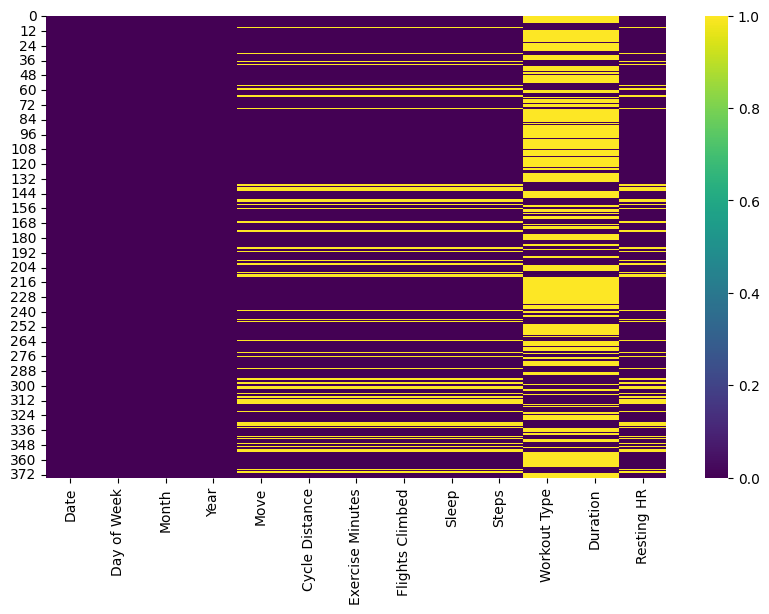

In [73]:
#to visualise the distribution of null values

plt.figure(figsize=(10,6))

sns.heatmap(df.isnull(), cmap='viridis')

For the move column (and most others) the missing values- in yellow- are relatively evenly distributed, so I will estimate them based on the surrounding data points

In [74]:
#get rid of the comma from the numbers over 1,000

move = df['Move'].str.replace(',','')

#convert the data from an object to a float

move_numeric = pd.to_numeric(move, errors = 'coerce')

#fill in missing values with linear interpolation

df['Move'] = move_numeric.interpolate('linear')

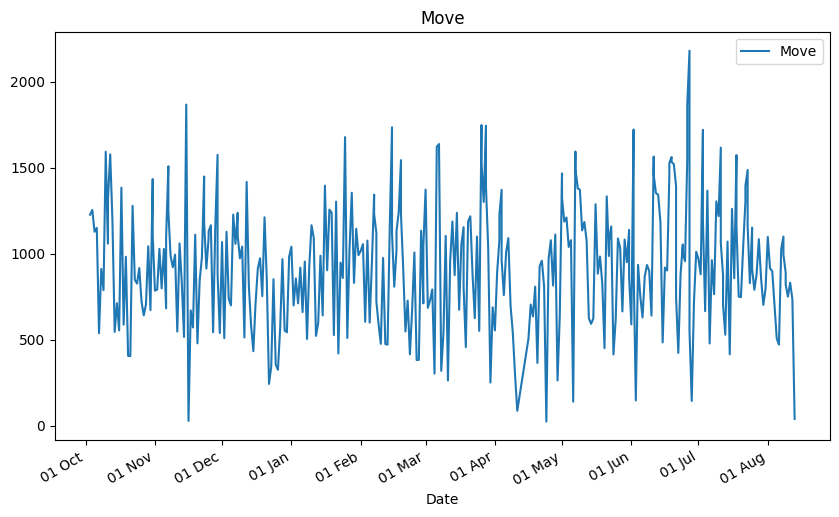

In [75]:
#to get a sense of what my variation in 'Move' looks like across the year

df.plot(x='Date', y='Move', title= 'Move', figsize=[10, 6])

dtFmt = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(dtFmt)

From this plot I can see there are many days where I move much more or much less than my average/target

In [76]:
df['Move'].mean()

943.5613333333333

My target 'move' goal is 750

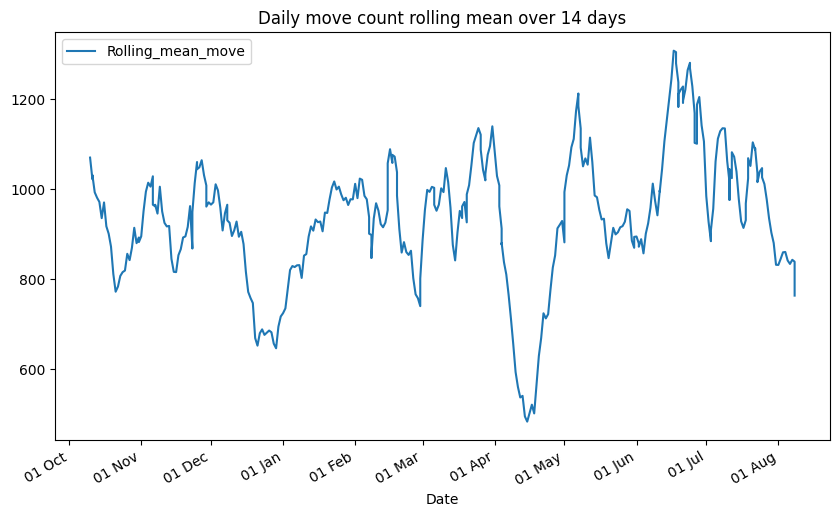

In [77]:
#to see if there are any sustained periods of variation, I'll update the plot using the rolling average move value across a couple weeks

df['Rolling_mean_move'] = df['Move'].rolling(14,center=True).mean()

df.plot(x='Date', y='Rolling_mean_move', title= 'Daily move count rolling mean over 14 days', figsize=[10, 6])

dtFmt = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(dtFmt)

I am not surprised by the two big sustained dips- I know I move less over Christmas, and in mid-April I was sick for 5 days

#### I'm interested to see how my average move count varies by month, and by day of week

Text(0.5, 1.0, 'Mean move by month')

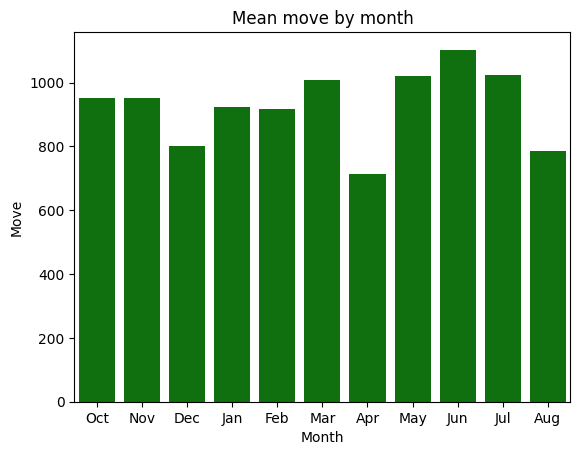

In [78]:
sns.barplot(df.groupby('Month')['Move'].mean(), 
            order = [10,11,12,1,2,3,4,5,6,7,8], 
            formatter = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',10:'Oct',11:'Nov',12:'Dec'},
           color = 'green')

plt.title('Mean move by month')

Text(0.5, 1.0, 'Mean move by day of week')

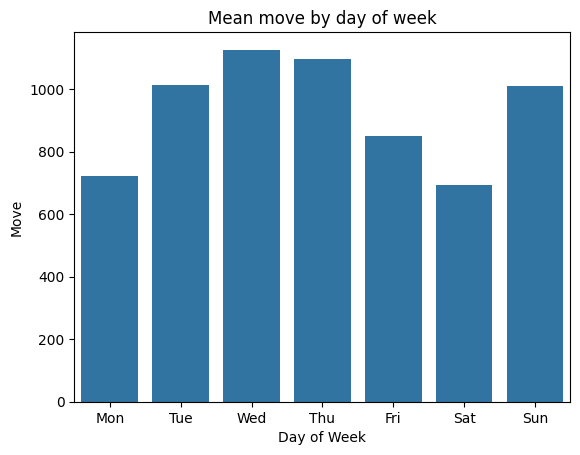

In [79]:
sns.barplot(df.groupby('Day of Week')['Move'].mean(), 
            order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.title('Mean move by day of week')

Useful to know that Mondays and Saturdays are substantially lower than the other days on average, and to a lesser extent Fridays. Mondays and Fridays I tend to work from home, and I have less movement baked into the day

Text(0.5, 1.0, 'Distribution of daily move values')

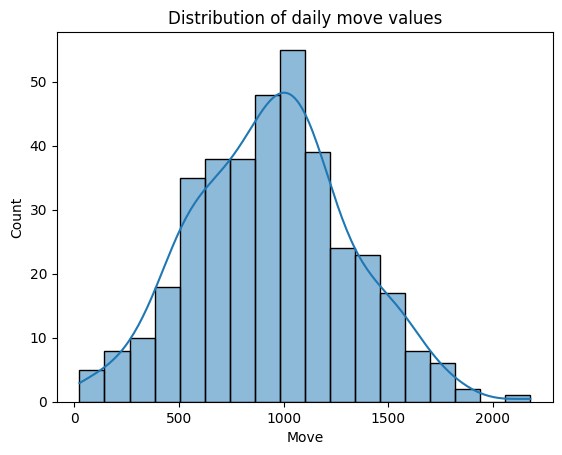

In [80]:
sns.histplot(df['Move'],bins =18, binwidth =120, kde =True)

#Calculated number of bins by doing sqrt of number of data points, rounding up. sqrt 316 = 17.8
#Bin width = range/number bins. Range = 2179 - 24 = 2155. 2155/18 = 119.7

plt.title('Distribution of daily move values')

#### If I want to address the days where I exercise least, it may be useful to have plots of days/ months where my move is less than 500

In [81]:
move_sub500 = df.loc[df['Move'] < 500]

Text(0.5, 1.0, 'Number of days with <500 move (by month)')

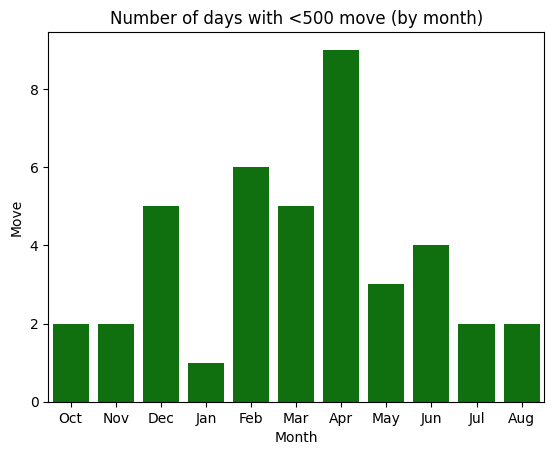

In [82]:
sns.barplot(move_sub500.groupby('Month')['Move'].count(), 
            order = [10,11,12,1,2,3,4,5,6,7,8], 
            formatter = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',10:'Oct',11:'Nov',12:'Dec'},
           color = 'green')

plt.title('Number of days with <500 move (by month)')

As mentioned before, much of the April spike can be explained by being ill, and December includes those often lazy Christmas days. I'm surprised to see February and March substantially higher than some other months- perhaps the poor weather this year put me off going outside

Text(0.5, 1.0, 'Number of days with <500 move (by day of week)')

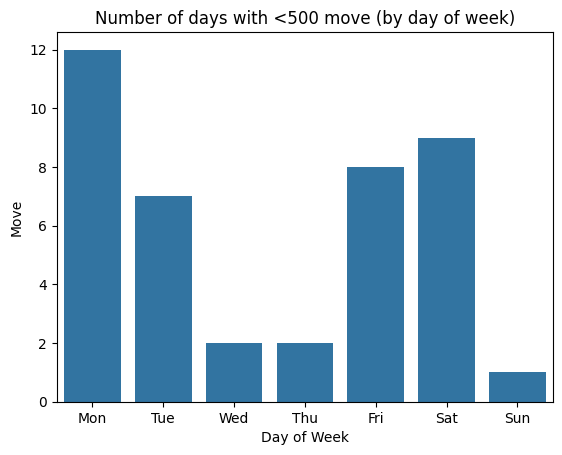

In [83]:
sns.barplot(move_sub500.groupby('Day of Week')['Move'].count(), 
            order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.title('Number of days with <500 move (by day of week)')

It's useful to see how few Wednesdays, Thursdays and Sundays I'm moving less than 500, as these are the days where I tend to have lots of regular movement built into the day. Mondays seem to be a real weakness, and should receive some concerted effort to address

I suspect it may also be useful to examine at some point how my movement varies within each day. i.e. am I particularly prone to being sedentary in the mornings or afternoons? This would likely reveal obvious scope for  changes that improve my "Move" consistency.

## Analysis part 2: looking for factors that link to move amount

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               375 non-null    datetime64[ns]
 1   Day of Week        375 non-null    object        
 2   Month              375 non-null    int64         
 3   Year               375 non-null    int64         
 4   Move               375 non-null    float64       
 5   Cycle Distance     316 non-null    object        
 6   Exercise Minutes   316 non-null    object        
 7   Flights Climbed    316 non-null    object        
 8   Sleep              316 non-null    object        
 9   Steps              316 non-null    object        
 10  Workout Type       159 non-null    object        
 11  Duration           159 non-null    object        
 12  Resting HR         316 non-null    object        
 13  Rolling_mean_move  362 non-null    float64       
dtypes: datetim

In [85]:
#starting with exercise minutes
type(df['Exercise Minutes'].iloc[205])

str

In [86]:
df['Exercise Minutes'] = df['Exercise Minutes'].str.replace('-','NaN')

df['Exercise Minutes'] = pd.to_timedelta(df['Exercise Minutes'])

df['Exercise Minutes'] = df['Exercise Minutes'].apply(lambda x: x.total_seconds()/60)

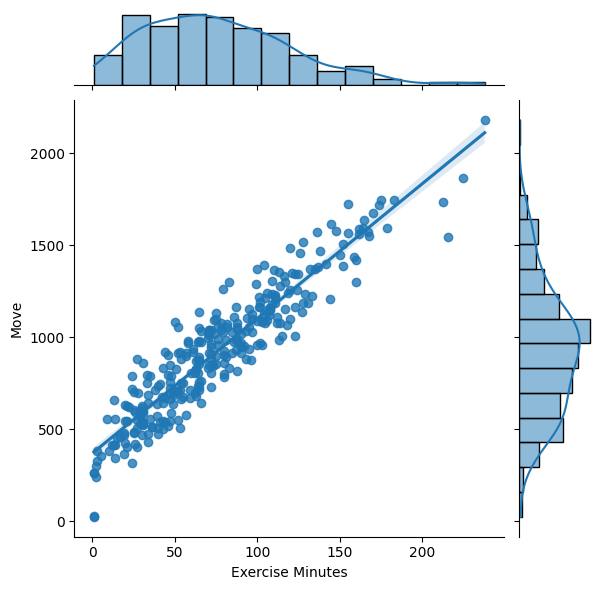

In [87]:
sns.jointplot(x= 'Exercise Minutes', y= 'Move',data= df, kind='reg', dropna = True)

In [88]:
#Do the same with sleep
type(df['Sleep'].iloc[0])

str

In [89]:
df['Sleep'] = df['Sleep'].str.replace('-','NaN')

df['Sleep'] = pd.to_timedelta(df['Sleep'])

df['Sleep'] = df['Sleep'].apply(lambda x: x.total_seconds()/3600)

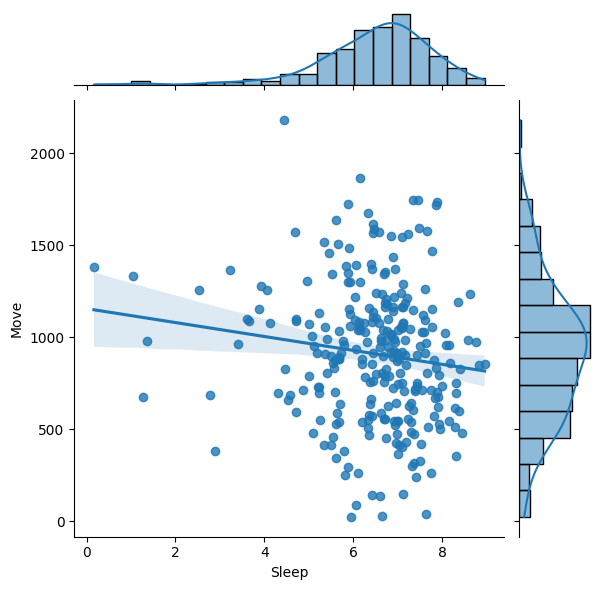

In [90]:
sns.jointplot(x= 'Sleep', y= 'Move',data= df, kind='reg', dropna = True)

In [91]:
#Now with flights climbed
type(df['Flights Climbed'].iloc[0])

str

In [92]:
df['Flights Climbed'] = df['Flights Climbed'].str.replace('-','NaN')

df['Flights Climbed'] = pd.to_numeric(df['Flights Climbed'], errors = 'coerce')

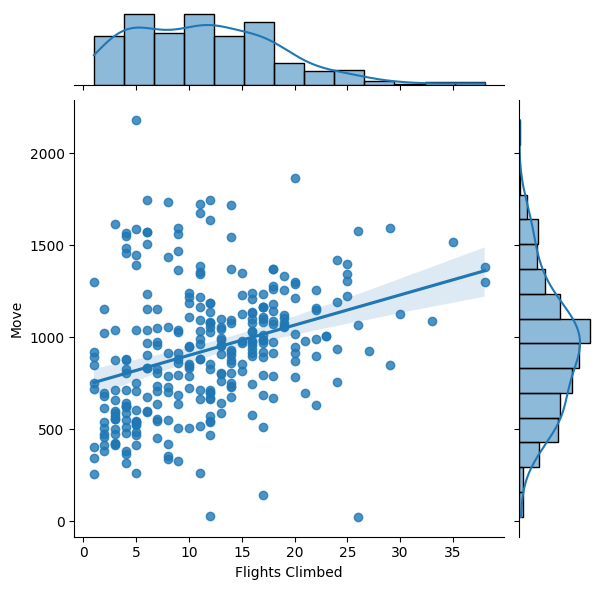

In [93]:
sns.jointplot(x= 'Flights Climbed', y= 'Move',data= df, kind='reg', dropna = True)

In [94]:
#And Steps
type(df['Steps'].iloc[0])

str

In [95]:
df['Steps'] = df['Steps'].str.replace(',','')

df['Steps'] = df['Steps'].str.replace('-','NaN')

df['Steps'] = pd.to_numeric(df['Steps'], errors = 'coerce')

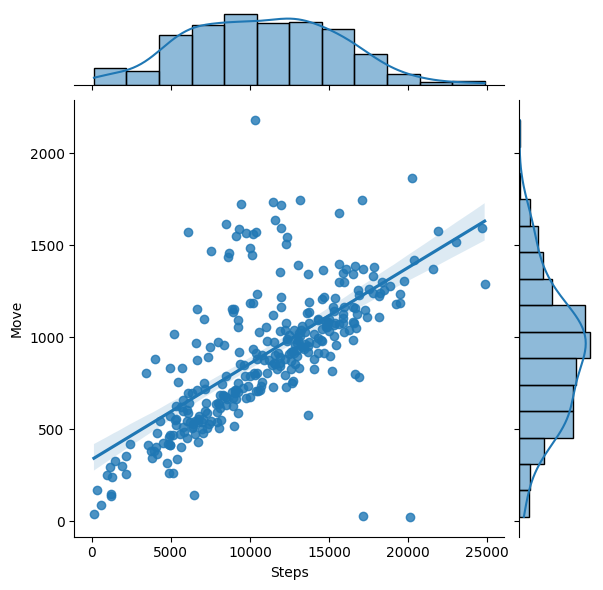

In [96]:
sns.jointplot(x= 'Steps', y= 'Move',data= df, kind='reg', dropna = True)

In [97]:
df2 = df[['Exercise Minutes','Sleep','Move','Flights Climbed','Steps']].dropna()

<Axes: >

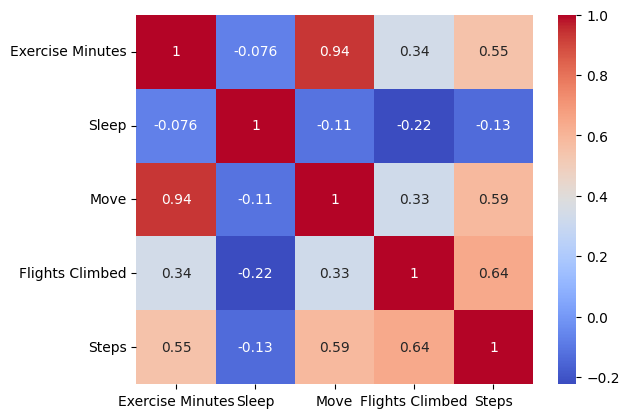

In [98]:
#to get a sense of which factors corrolate with the move value (the numbers in the boxes are the corrolation coefficients, a measure of the closeness of association of the points)

sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)

As expected, the number of steps and the number of exercise minutes appear to corrolate strongly with the "Move" measure. Sleep appears to make little difference to any of the other values

#### Finally I'll look more closely at how my workouts affect my overall movement

In [99]:
#look at the distribution of different workout types

df.value_counts(df['Workout Type'])

Workout Type
Cycling                         110
Running                          24
Walking                          14
Functional Strength Training     10
Elliptical                        1
Name: count, dtype: int64

I know I don't often set my watch to record when I do walks or gym sessions, so I'll just work with cycling and running for now

In [100]:
df['Workout Type'] = df['Workout Type'].fillna('None')

In [101]:
#Selecting for the days where I do a running or cycling workout

run_cycle = df.drop(df[(df['Workout Type'] == 'Walking') 
                       | (df['Workout Type'] == 'Elliptical')
                       | (df['Workout Type'] == 'Functional Strength Training')].index)

In [102]:
run_cycle['Workout Type'].value_counts()

Workout Type
None       216
Cycling    110
Running     24
Name: count, dtype: int64

In [103]:
run_cycle['Duration'] = run_cycle['Duration'].str.replace('-','NaN')

run_cycle['Duration'] = run_cycle['Duration'].fillna(0)

run_cycle['Duration'] = pd.to_timedelta(run_cycle['Duration'])

run_cycle['Duration'] = run_cycle['Duration'].apply(lambda x: x.total_seconds()/60)

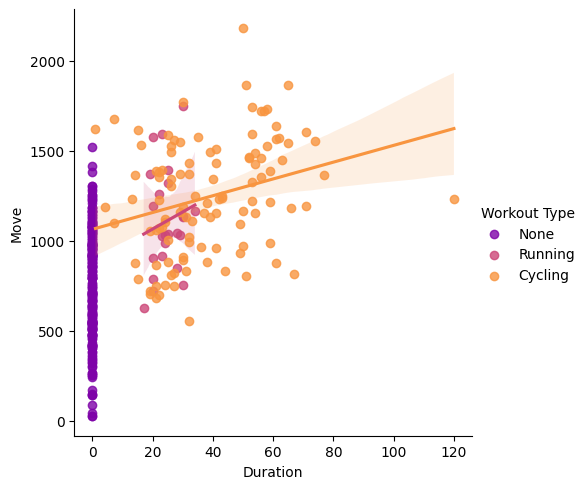

In [104]:
sns.lmplot(x= 'Duration',y='Move',hue= 'Workout Type', palette = 'plasma', data=run_cycle)

From a quick glance, it seems clear that doing a workout helps a lot with clearing the 500 "Move" count minimum

### Conclusions

My goal is to improve consistency by targeting the days I am prone to moving the least. I have found that Mondays and Saturdays are on average my least active days, but also the days I'm most likely to not move much at all. Simply bearing this in mind will help me make more effort to move on those days.

My overall steps and the presence of a workout are clearly connected to improving my "Move" count, and either building in more frequent, short walks, or a one-off intensive 20 minute run on these lazy days would do much to correct the shortfall. It is useful to note that sleeping well or poorly the night before doesn't seem to predict my activity the next day.